## Uso de los algoritmos de Clustering: K Means y GMM

Correo de contacto: epineda.amezquita@gmail.com  
github: https://github.com/epinedaWorks/

Los ejercicios realizados en este notebook son de uso público, se hace la aclaración que el aprendizaje y conocimiento obtenido radica en diversas fuentes, asimismo, la experiencia del autor en desarrollo de software. 

Las imagenes de ejemplo se encuentran en el directorio "img", se hace referencia por medio de **./img/**    


Descripción:  
![Enunciado.JPG](img/Enunciado.JPG)  


Se importan las librerías principales: 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

Se cargan los datos del archivo estaturas:

In [2]:
path='./data/estaturas.xlsx'
#dfVinos = pd.read_csv(path)

dataEstatura = pd.read_excel(path)

print (dataEstatura)

### Creacion de variables globales
estaturaMinima=0
estaturaMaxima=0
edadMinima=0
edadMaxima=0

    Estatura(metros)  Edad(años)
0               1.77          26
1               1.74          31
2               1.72          24
3               1.78          34
4               1.65          32
5               1.66          29
6               1.64          27
7               1.85          34
8               1.85          26
9               1.75          21
10              1.73          23
11              1.79          25
12              1.82          24
13              1.65          25
14              1.79          25
15              1.72          34
16              1.70          26
17              1.57          25
18              1.66          26
19              1.75          27
20              1.77          32
21              1.80          40
22              1.85          25
23              1.82          24
24              1.75          38
25              1.73          34
26              1.55          29
27              1.76          28
28              1.68          27


Programando el algoritmo desde cero, sin Sklearn tomar en cuenta que el valor de K se va a ingresar por parámtetro.

In [3]:
np.random.seed(1500)  ## Se define un valor random estatico

def calcularValoresMinimosMaximos(dataSetGeneral):
    
    global estaturaMinima
    global estaturaMaxima
    global edadMinima
    global edadMaxima
    
    estaturaMinima=np.min(dataSetGeneral.loc[:,'Estatura(metros)'])
    estaturaMaxima=np.max(dataSetGeneral.loc[:,'Estatura(metros)'])

    edadMinima=np.min(dataSetGeneral.loc[:,'Edad(años)'])
    edadMaxima=np.max(dataSetGeneral.loc[:,'Edad(años)'])
    
    print('estaturaMinima: ',estaturaMinima)
    print('estaturaMaxima: ',estaturaMaxima)
    print('edadMinima: ',edadMinima)
    print('edadMaxima: ',edadMaxima)

    

calcularValoresMinimosMaximos(dataEstatura)


estaturaMinima:  1.55
estaturaMaxima:  1.85
edadMinima:  21
edadMaxima:  40


#### Selección de centroides:  

Se usa un metodo random entre el valor mínimo y el máximo de cada variable o columna del dataset

In [4]:
def encontrarCentroides(K=2):
    mu=[]
    ## ojo, se deja la opción for por si en caso se agregan mas variables
    for i in range(0,K):
        centroideEstatura=np.random.uniform(estaturaMinima,estaturaMaxima)
        centroideEdad=np.random.randint(edadMinima,edadMaxima)

        mu.append([centroideEstatura,centroideEdad])
    
    #Se crea una matriz de ceros con el dataset de origen
    ##Servirá para asignar a cada elemento un posible cluster
    r=np.zeros(dataEstatura.shape[0]*K).reshape(dataEstatura.shape[0],K)
    
    return mu, r

Observar que se tienen 2 puntos con sus coordenas x,y, ambos representan los 2 centroides de la cantidad de K agrupaciones elegidas, en este caso, viene por [estatura, edad]


In [5]:
def KMeans(K=2):
    mu=encontrarCentroides(K)[0]
    r=encontrarCentroides(K)[1]
    
    plot_counter=0
    J_plot=[]
    for i in range(1,10): #Maximo de 10 iteraciones
        J=0 #Funcion de error, costo o distorsión

        #Sumatoria de valores
        for n in range(0,dataEstatura.shape[0]): 
            x=np.array(dataEstatura.iloc[n,0:])
            mins=[]

            for k in range(0,K):
                distance=np.linalg.norm(x-mu[k])# Distancia Euclidiana
                mins.append(distance**2) #Agregar cada una de las distancias

            k_r=np.argmin(np.array(mins))#Indice con el valor minimo
            r[n,k_r]=1 

        #Calculo de la Distorsión, servirá para graficar
        for n in range(0,dataEstatura.shape[0]):
            for k in range(0,K):
                distance=np.linalg.norm(x-mu[k])
                J=r[n,k]*(distance**2)+J
        J_plot.append(J)

        #Actualización de centroides
        for k in range(0,K):
            count_1,count_2=0,0
            for n in range(0,dataEstatura.shape[0]):
                x=np.array(dataEstatura.iloc[n,0:])
                count_1=r[n,k]*x+count_1
                count_2=r[n,k]+count_2
            mu[k]=count_1/count_2

        print(J)
        #Salir cuando la diferencia sea muy poca
        if i>1 and abs(J-J_prev)<0.5:
            break
        J_prev=J
        plot_counter=1+plot_counter
        #Vector de ceros en uso
        r=np.zeros(dataEstatura.shape[0]*K).reshape(dataEstatura.shape[0],K)
        
        
    plt.plot(J_plot,linestyle='-', marker='o',color='green')
    plt.ylabel('J: Medida del error o distorción')
    plt.xlabel('Iteración')
    plt.show()
        
    return mu, r, J_plot

Prueba de Kmeans con K=2

473.7561396218757
239.35960510204086
286.9116347500001
346.5613796235829
427.7621568819512
523.2912827777782
523.2912827777782


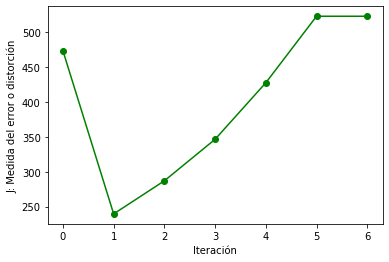

In [6]:
kmean2=KMeans(2)

Función para graficar centroides y sus correspondientes puntos dispersos:

In [7]:
def graficarCentroidesYpuntosDispersos(modelo):    
    x=dataEstatura['Edad(años)'],
    y=dataEstatura['Estatura(metros)']
    mu=pd.DataFrame(modelo[0]) ## la posición 0 devuelve mu 
    
    plt.scatter(x,y,marker='.')
    plt.scatter(mu[1],mu[0],s=100,marker='x',color='red')
    plt.show()

2429.0297104066594
870.29892133059
608.7789445704678
566.7799467439061
523.2912827777782
523.2912827777782


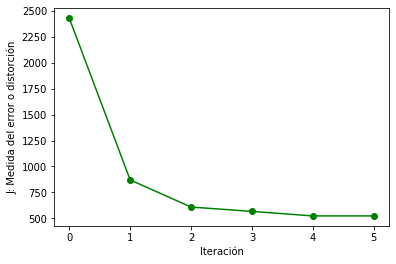

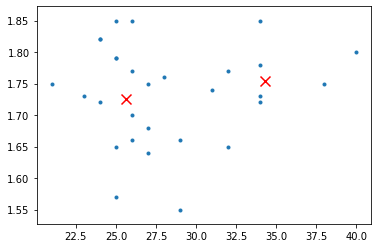

In [8]:
graficarCentroidesYpuntosDispersos(KMeans(2))

In [9]:
dataEstatura#[2]=2

,Estatura(metros),Edad(años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


In [10]:
def graficarCentroidesYpuntosDispersosAgrupados(modelo):    
    dataEstaturaCopy=dataEstatura.copy()
    x=dataEstaturaCopy['Edad(años)'],
    y=dataEstaturaCopy['Estatura(metros)']
    mu=pd.DataFrame(modelo[0]) ## la posición 0 devuelve mu 
    r=modelo[1]   ## la posición 1 devuelve r del modelo
    
    ## Se crear una columna o un arreglo de nx1 para obtener la categoria
    columnaDeCluster=[]
    for row in r:
        columnaDeCluster.append(np.argmax(row)+1)
    
    ## Concatenar nueva columna con los tipos de cluster identificados a la par de las observaciones
    dataEstaturaCopy['Tipo']=columnaDeCluster
    
    #plt.scatter(x,y,c=dataEstaturaCopy[2],marker='.')
    plt.scatter(x,y,c=columnaDeCluster,marker='.')
    plt.scatter(mu[1],mu[0],s=100,marker='x',color='red')
    plt.show()
    print("======================== Categorias identificadas ======================== ")
    print("")
    print(dataEstaturaCopy)
    print("")
    print("========================================================================== ")

1052.646320110274
566.7799467439061
523.2912827777782
523.2912827777782


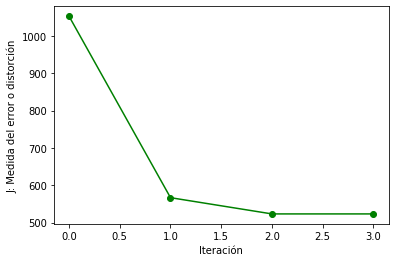

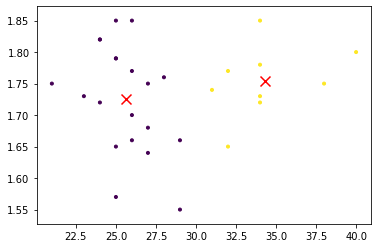

======================== Categorias identificadas ======================== 

    Estatura(metros)  Edad(años)  Tipo
0               1.77          26     1
1               1.74          31     2
2               1.72          24     1
3               1.78          34     2
4               1.65          32     2
5               1.66          29     1
6               1.64          27     1
7               1.85          34     2
8               1.85          26     1
9               1.75          21     1
10              1.73          23     1
11              1.79          25     1
12              1.82          24     1
13              1.65          25     1
14              1.79          25     1
15              1.72          34     2
16              1.70          26     1
17              1.57          25     1
18              1.66          26     1
19              1.75          27     1
20              1.77          32     2
21              1.80          40     2
22              1.85      

In [11]:
graficarCentroidesYpuntosDispersosAgrupados(KMeans(2))

# Evaluar con K=1,2,3,4,5
Se agregan los nuevos datos al dataset


In [12]:
dataEstaturaMasValores = pd.read_excel(open(path, 'rb'),
              sheet_name='valtest(normales)') 

dataSetTotal = pd.concat([dataEstatura, dataEstaturaMasValores])

print(dataSetTotal.head())
print("\nValores Max/Min: \n")
calcularValoresMinimosMaximos(dataSetTotal)
print(" \nShape: ", dataSetTotal.shape)
print("Size: ", dataSetTotal.size)



   Estatura(metros)  Edad(años)
0              1.77          26
1              1.74          31
2              1.72          24
3              1.78          34
4              1.65          32

Valores Max/Min: 

estaturaMinima:  1.55
estaturaMaxima:  1.85
edadMinima:  21
edadMaxima:  40
 
Shape:  (37, 2)
Size:  74


Cambiar el nombre al dataset general que tienen todos los metodos antes definidos

In [13]:
dataEstatura=dataSetTotal.copy()

# K=1, con los valores de la hoja 2 del Excel

333.05194950933515
191.2573216216215
191.2573216216215


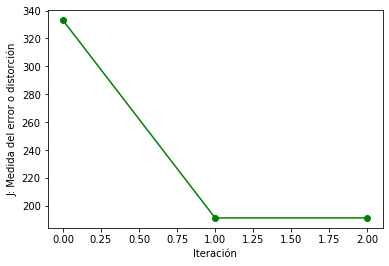

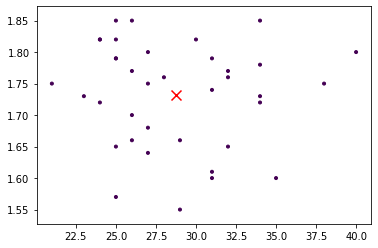

======================== Categorias identificadas ======================== 

    Estatura(metros)  Edad(años)  Tipo
0               1.77          26     1
1               1.74          31     1
2               1.72          24     1
3               1.78          34     1
4               1.65          32     1
5               1.66          29     1
6               1.64          27     1
7               1.85          34     1
8               1.85          26     1
9               1.75          21     1
10              1.73          23     1
11              1.79          25     1
12              1.82          24     1
13              1.65          25     1
14              1.79          25     1
15              1.72          34     1
16              1.70          26     1
17              1.57          25     1
18              1.66          26     1
19              1.75          27     1
20              1.77          32     1
21              1.80          40     1
22              1.85      

In [14]:
graficarCentroidesYpuntosDispersosAgrupados(KMeans(1))

# K=2, con los valores de la hoja 2 del Excel

248.20445446031476
762.0697545605535
710.5304069696967
710.5304069696967


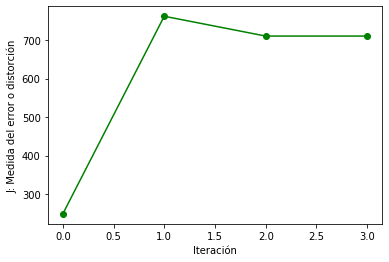

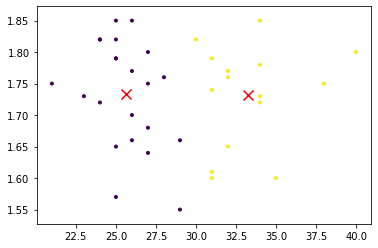

======================== Categorias identificadas ======================== 

    Estatura(metros)  Edad(años)  Tipo
0               1.77          26     1
1               1.74          31     2
2               1.72          24     1
3               1.78          34     2
4               1.65          32     2
5               1.66          29     1
6               1.64          27     1
7               1.85          34     2
8               1.85          26     1
9               1.75          21     1
10              1.73          23     1
11              1.79          25     1
12              1.82          24     1
13              1.65          25     1
14              1.79          25     1
15              1.72          34     2
16              1.70          26     1
17              1.57          25     1
18              1.66          26     1
19              1.75          27     1
20              1.77          32     2
21              1.80          40     2
22              1.85      

In [15]:
graficarCentroidesYpuntosDispersosAgrupados(KMeans(2))

# K=3, con los valores de la hoja 2 del Excel

645.195794327295
722.8333099616291
797.0595414285714
797.0595414285714


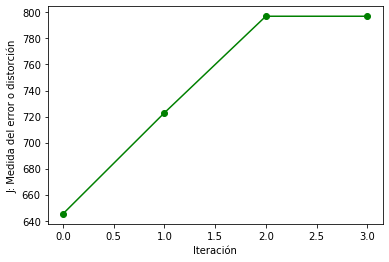

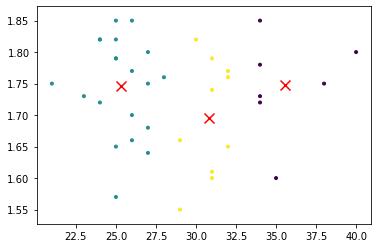

======================== Categorias identificadas ======================== 

    Estatura(metros)  Edad(años)  Tipo
0               1.77          26     2
1               1.74          31     3
2               1.72          24     2
3               1.78          34     1
4               1.65          32     3
5               1.66          29     3
6               1.64          27     2
7               1.85          34     1
8               1.85          26     2
9               1.75          21     2
10              1.73          23     2
11              1.79          25     2
12              1.82          24     2
13              1.65          25     2
14              1.79          25     2
15              1.72          34     1
16              1.70          26     2
17              1.57          25     2
18              1.66          26     2
19              1.75          27     2
20              1.77          32     3
21              1.80          40     1
22              1.85      

In [16]:
graficarCentroidesYpuntosDispersosAgrupados(KMeans(3))

# K=4, con los valores de la hoja 2 del Excel

1498.5051073765787
818.4718508487653
830.5187768899523
830.5187768899523


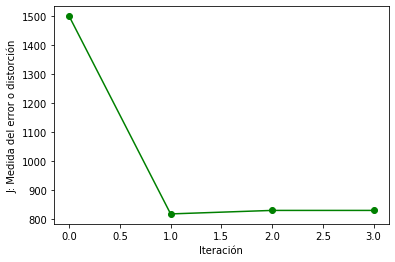

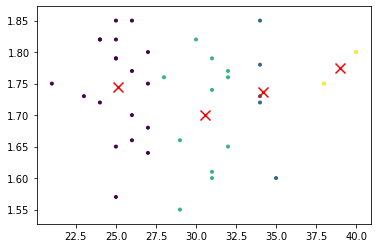

======================== Categorias identificadas ======================== 

    Estatura(metros)  Edad(años)  Tipo
0               1.77          26     1
1               1.74          31     3
2               1.72          24     1
3               1.78          34     2
4               1.65          32     3
5               1.66          29     3
6               1.64          27     1
7               1.85          34     2
8               1.85          26     1
9               1.75          21     1
10              1.73          23     1
11              1.79          25     1
12              1.82          24     1
13              1.65          25     1
14              1.79          25     1
15              1.72          34     2
16              1.70          26     1
17              1.57          25     1
18              1.66          26     1
19              1.75          27     1
20              1.77          32     3
21              1.80          40     4
22              1.85      

In [17]:
graficarCentroidesYpuntosDispersosAgrupados(KMeans(4))

# K=5, con los valores de la hoja 2 del Excel

691.7386783068375
799.9076241291885
826.8312432848898
857.6423842712845
857.6423842712845


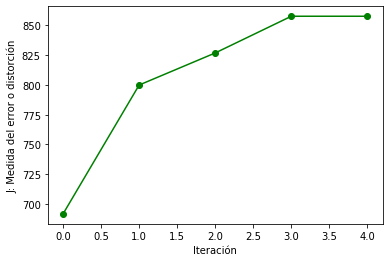

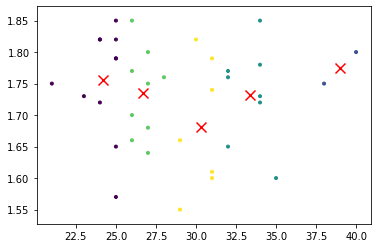

======================== Categorias identificadas ======================== 

    Estatura(metros)  Edad(años)  Tipo
0               1.77          26     4
1               1.74          31     5
2               1.72          24     1
3               1.78          34     3
4               1.65          32     3
5               1.66          29     5
6               1.64          27     4
7               1.85          34     3
8               1.85          26     4
9               1.75          21     1
10              1.73          23     1
11              1.79          25     1
12              1.82          24     1
13              1.65          25     1
14              1.79          25     1
15              1.72          34     3
16              1.70          26     4
17              1.57          25     1
18              1.66          26     4
19              1.75          27     4
20              1.77          32     3
21              1.80          40     2
22              1.85      

In [18]:
graficarCentroidesYpuntosDispersosAgrupados(KMeans(5))

### Ojo:
Observar que con K=5 ya no se tiene una buena clasificación

# Metodo de GMM  

Se importan las librerías que se van a utilizar, tomar en cuenta que para este caso sí está permitido usar Sklearn


In [19]:
import itertools
import matplotlib as mpl
from scipy import linalg
from sklearn import mixture

In [20]:
#### GMM ###
from sklearn.mixture import GaussianMixture

def calcularGMM(K=2, data=dataEstatura):
    
    gmm = GaussianMixture(n_components=K)
    gmm.fit(data)

    #Predicciones usando GMM
    labels = gmm.predict(data)
    frame = pd.DataFrame(data)
    frame['cluster'] = labels
    frame.columns = ['Weight', 'Height', 'cluster']

    color=['blue','green','cyan', 'black']
    for k in range(0,K):
        data = frame[frame["cluster"]==k]
        plt.scatter(data["Height"],data["Weight"],c=color[k])
    plt.show()

## Evaluando K=1 usando GMM

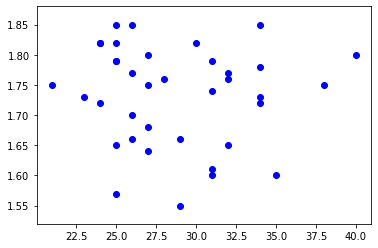

In [21]:
calcularGMM(1)

## Evaluando K=2 usando GMM

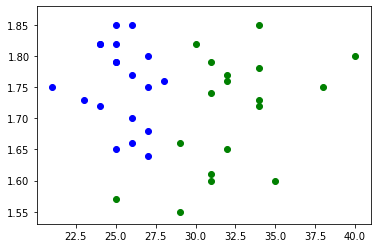

In [22]:
calcularGMM(2)

## Evaluando K=3 usando GMM

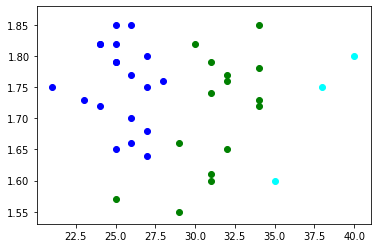

In [23]:
calcularGMM(3)

## Evaluando K=4 usando GMM

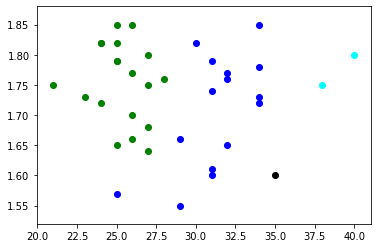

In [24]:
calcularGMM(4)

## Evaluando K=5 usando GMM

Se hace la observación que la siguiente ejecución presenta error, se ha dejado para mostrar el comportamiento del algoritmo


IndexError: list index out of range

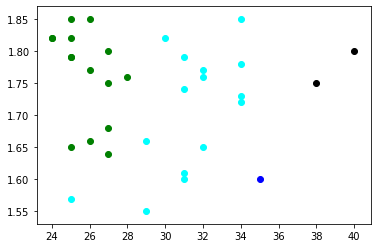

In [25]:
print("Se hace la observación que la siguiente ejecución presenta error, se ha dejado para mostrar el comportamiento del algoritmo")
calcularGMM(5)

# Conclusiones  

    1. Evaluando los modelos con KMeans y GMM, se concluye que los resultados son muy similares.
    2. Llama la atención que al evaluar con K=5, se presentan errores tanto en GMM y en Kmeans.
    3. Ambos algoritmos son buenos clasificadores.
    4. Respecto al problema expuesto de estaturas, se pueden tener varias categorías, por ejemplo con 2 categorías se puede interpretar que la mayoría de estudiantes están entre los 22 y 24 años de edad, con una estatura variada.
    5. Se observan valores atípicos, como un valor de 40 años o una estatura muy baja.
    6. A mi criterio el método del codo si es funcional ya que se observa en las graficas que la curva comienza a estabilizarse a partir de ciertas iteraciones, donde el resultado de la cantidad de grupo muestra los mismos resultados, según observaciones, con k=2 y k=3 se aprecia bien el método del codo.